In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras import layers
from matplotlib import pyplot as plt

Load the TFRecord file for the WAV demonstration sample

In [2]:
filenames = ["../data/featuresFromSample.tfr"]
raw_dataset = tf.data.TFRecordDataset(filenames)

# This is just so np.vstack has another row to stack with.
placeholder_array = np.array([str(k) for k in range(0,128)])

# Extract the 128-dimensional vectors from the TFRecord file.
for raw_record in raw_dataset:
    sample = tf.train.SequenceExample()
    sample.ParseFromString(raw_record.numpy())
    for i in range(0,len(sample.feature_lists.feature_list['audio_embedding'].feature)):
        placeholder_array = np.vstack((placeholder_array, np.array(list(sample.feature_lists.feature_list['audio_embedding'].feature[i].bytes_list.value[0]))))

features = np.delete(placeholder_array, 0, 0).astype(float)
print(len(features))
features

12


array([[ 85., 131., 153., ...,  38.,   0., 255.],
       [ 84.,  81., 162., ...,  70.,  60., 255.],
       [ 47., 117., 125., ...,  68., 233.,  31.],
       ...,
       [ 75., 107., 164., ...,   0.,  50., 255.],
       [ 57.,  83., 153., ...,   0.,  17.,  87.],
       [ 55.,  70., 155., ..., 144.,  87.,  28.]])

Load the trained model and use it to predict the presence of speech in the sample

In [3]:
json_file = open('../models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights('../models/model.h5')
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print("Loaded model from disk")

predictions = np.round(model.predict(features))
predictions

Loaded model from disk


array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

Finally, make the 1D heatmap visualizing the predictions

(0.0, 12.0)

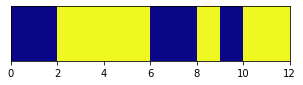

In [4]:
plt.rcParams['figure.figsize']= 5,1

x = np.arange(0,len(features))
y = predictions

fig, (ax) = plt.subplots(nrows=1)
extent = [0, len(features), 0., 1.]
ax.imshow(y[np.newaxis,:], cmap='plasma', aspect='auto', extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])